In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [3]:
canada_df = pd.read_excel('canada_immigration.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

#clean the data set
canada_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
canada_df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
canada_df['Total'] = canada_df.sum(axis=1)
canada_df.set_index('Country', inplace=True)
canada_df.index.name = None
canada_df.columns = list(map(str, canada_df.columns))

years = list(map(str, range(1980, 2014)))
canada_df

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [4]:
canada_df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5_immig = canada_df.head(5)
top_5_immig = top_5_immig[years].transpose()
top_5_immig

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


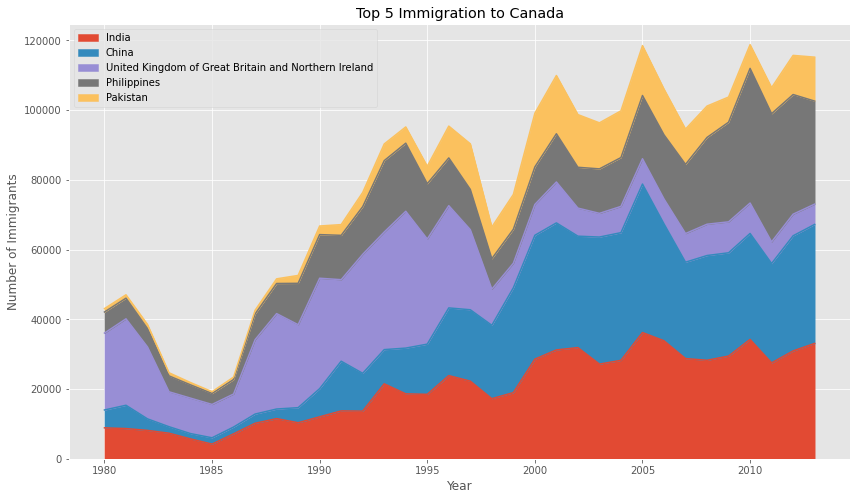

In [5]:
top_5_immig.plot(kind='area', figsize=(14, 8))

plt.title('Top 5 Immigration to Canada')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.grid(True)
plt.show()

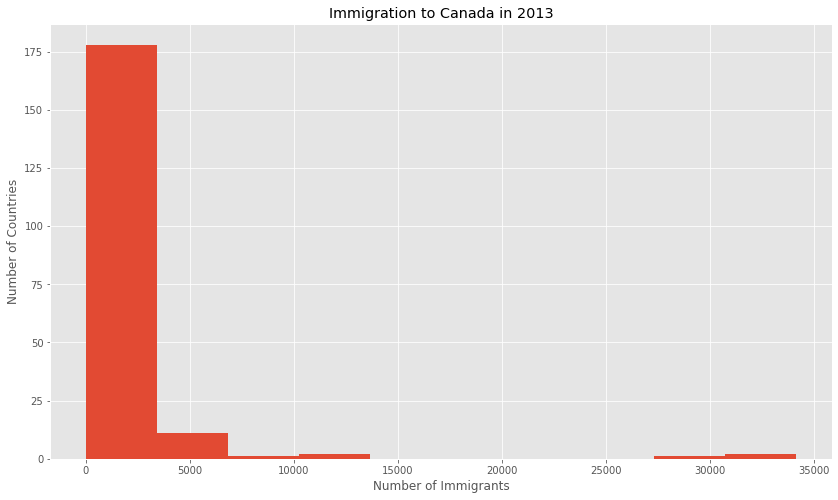

In [6]:
canada_df['2013'].plot(kind='hist', figsize=(14, 8))

plt.title('Immigration to Canada in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.grid(True)
plt.show()

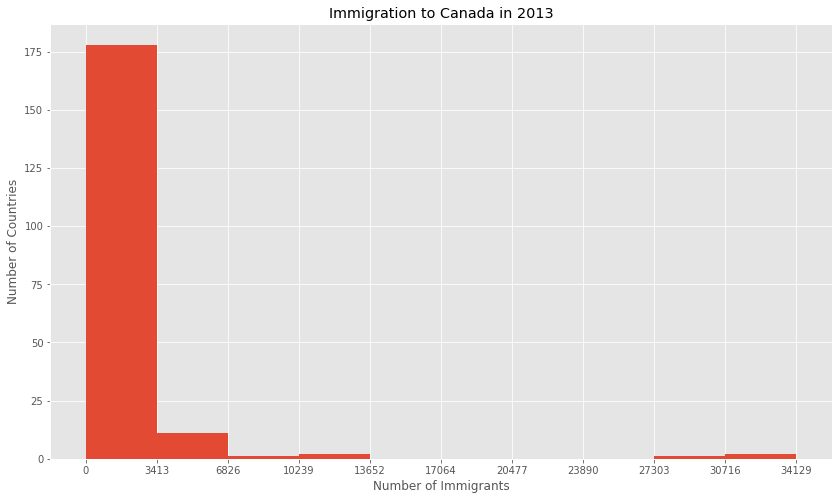

In [7]:
count, bin_edges = np.histogram(canada_df['2013'])
canada_df['2013'].plot(kind='hist', xticks=bin_edges, figsize=(14, 8))

plt.title('Immigration to Canada in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.grid(True)
plt.show()

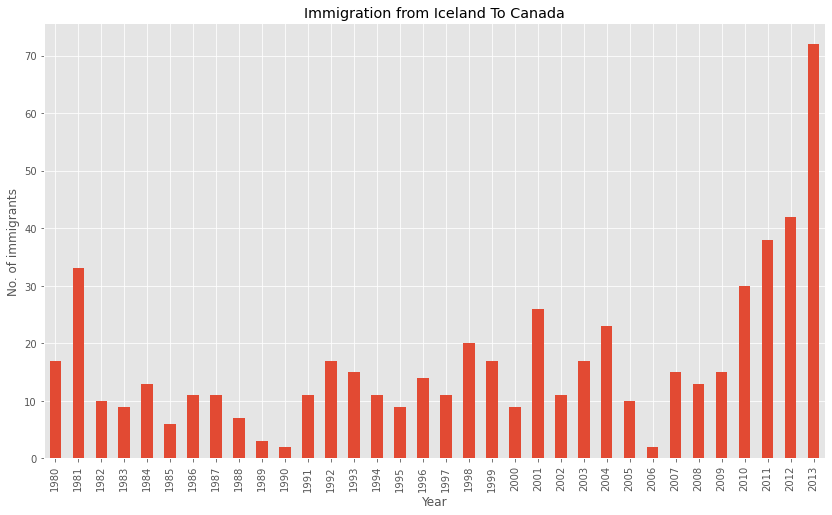

In [8]:
iceland = canada_df.loc['Iceland', years]
iceland.plot(kind='bar', figsize=(14, 8))

plt.title('Immigration from Iceland To Canada')
plt.ylabel('No. of immigrants')
plt.xlabel('Year')
plt.grid(True)
plt.show()

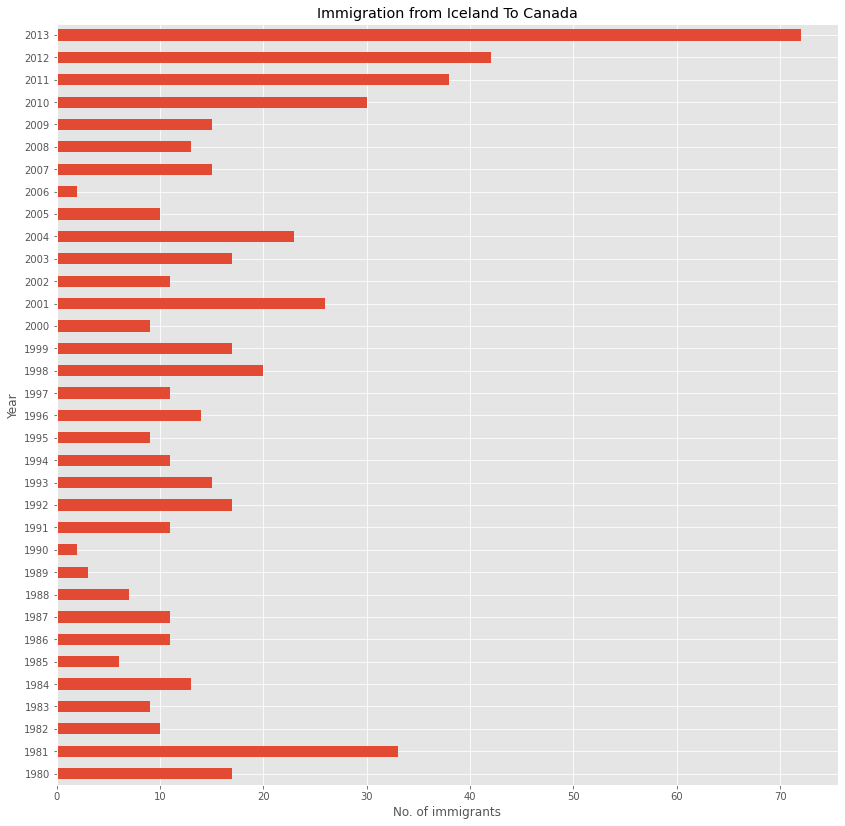

In [9]:
iceland = iceland[years].transpose()
iceland.plot(kind='barh', figsize=(14, 14))

plt.title('Immigration from Iceland To Canada')
plt.xlabel('No. of immigrants')
plt.ylabel('Year')
plt.grid(True)
plt.show()

In [10]:
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


**Question**: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.45.

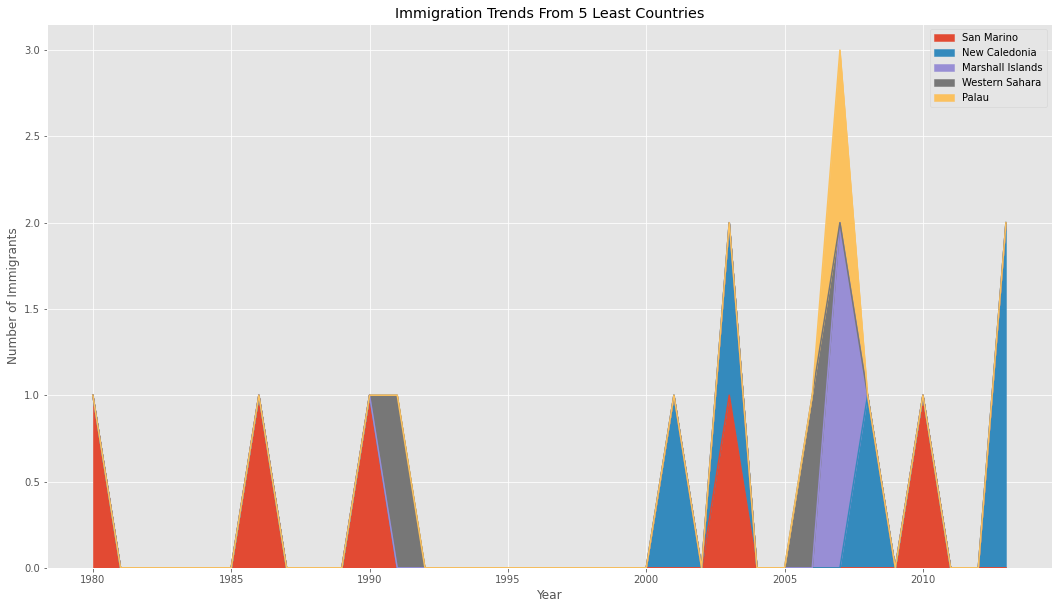

In [11]:
### type your answer here
df_bottom5 = canada_df.tail()
df_bottom5 = df_bottom5[years].transpose() 

df_bottom5.index = df_bottom5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_bottom5.plot(kind='area', figsize=(18, 10))# pass a tuple (x, y) size

plt.title('Immigration Trends From 5 Least Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

plt.show()

**Question**: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Year')

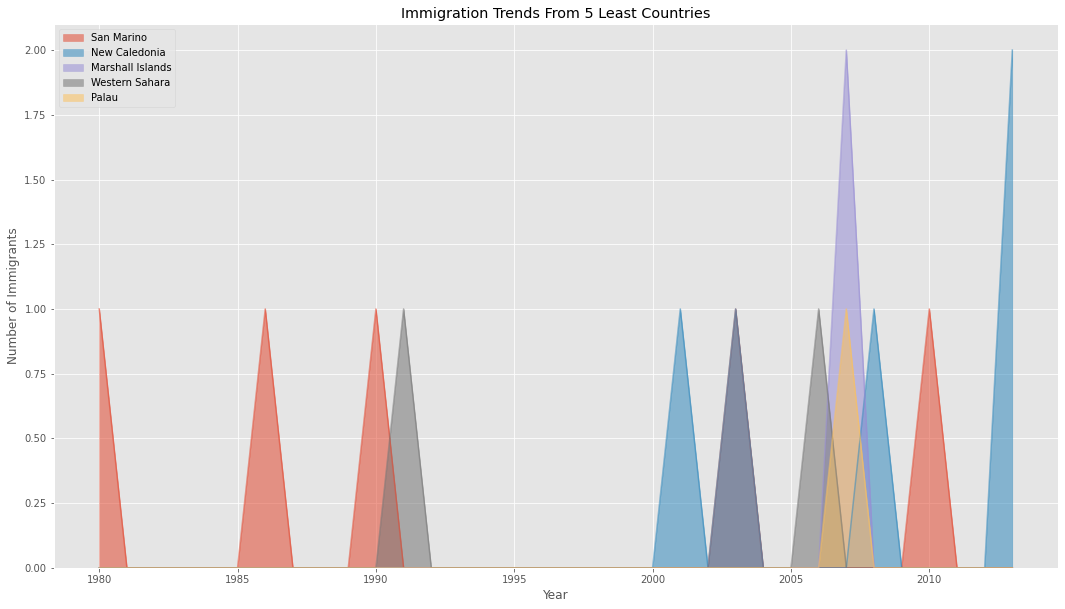

In [12]:
### type your answer here
ax = df_bottom5.plot(kind='area', alpha=0.55, figsize=(18, 10), stacked=False)

ax.set_title('Immigration Trends From 5 Least Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Year')

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

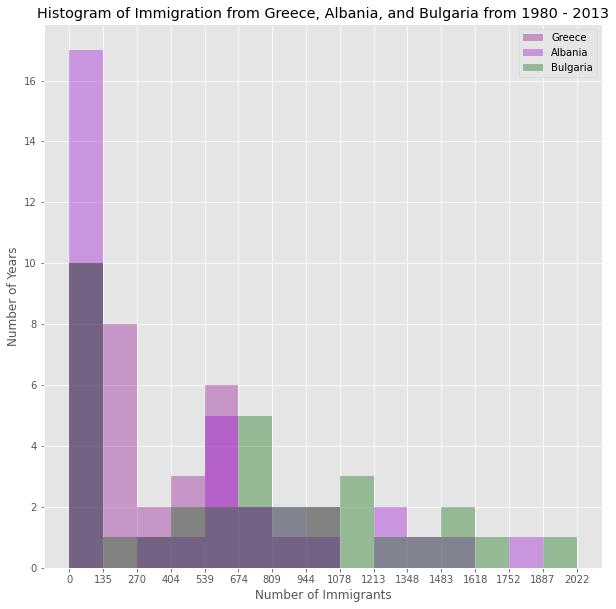

In [13]:
### type your answer here
df_s = canada_df.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
count, bin_edges = np.histogram(df_s, 15)

df_s.plot(kind='hist',
          figsize=(10, 10), 
          bins=15,
          xticks=bin_edges,
          color=['darkmagenta', 'darkviolet', 'darkgreen'],
          alpha=0.35
         )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question:** Using the scripting layter and the `canada_df` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.


Step 2: Plot the data.
   * Use `kind='barh'` to generate a bar chart with horizontal bars.
   * Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   * Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

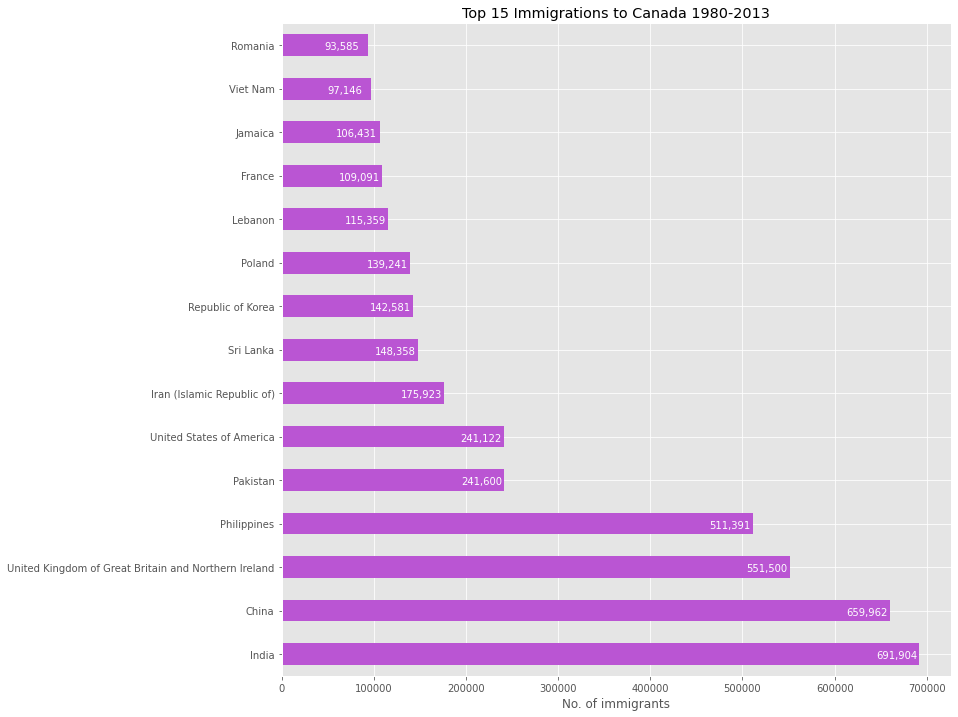

In [14]:
canada_df.sort_values(by='Total', ascending=False, inplace=True)
top_15 = canada_df['Total'].head(15)

top_15.plot(kind='barh', figsize=(12, 12), color='mediumorchid')

plt.title('Top 15 Immigrations to Canada 1980-2013')
plt.xlabel('No. of immigrants')

for index, value in enumerate(top_15):
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.grid(True)
plt.show()